In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load Data

In [2]:
df=pd.read_csv("relationships_advise_21_final.csv",sep=",")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# General

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725735 entries, 0 to 725734
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             725735 non-null  object 
 1   Toxicity           711910 non-null  float64
 2   Severe Toxicity    711910 non-null  float64
 3   Profanity          711910 non-null  float64
 4   Identity Attack    711910 non-null  float64
 5   Insult             711910 non-null  float64
 6   Threat             711910 non-null  float64
 7   author_flair_text  725735 non-null  object 
 8   body               725735 non-null  object 
 9   controversiality   725735 non-null  bool   
 10  created_utc        725735 non-null  object 
 11  distinguished      725735 non-null  object 
 12  edited             725735 non-null  bool   
 13  gilded             725735 non-null  int64  
 14  id                 725735 non-null  object 
 15  link_id            725735 non-null  object 
 16  pa

In [4]:
df.describe()

Toxicity  Severe Toxicity      Profanity  Identity Attack  \
count  711910.000000    711910.000000  711910.000000    711910.000000   
mean        0.220939         0.031081       0.150212         0.030799   
std         0.222996         0.083732       0.210124         0.064017   
min         0.000000         0.000101       0.000000         0.000112   
25%         0.044389         0.001612       0.019554         0.004292   
50%         0.123468         0.003643       0.045670         0.008251   
75%         0.337537         0.014189       0.186638         0.024600   
max         1.000000         1.000000       1.000000         0.989324   

              Insult         Threat         gilded          score  \
count  711910.000000  711910.000000  725735.000000  725735.000000   
mean        0.124347       0.031665       0.000411      12.121517   
std         0.175961       0.075987       0.021255      96.124245   
min         0.001688       0.000000       0.000000   -1114.000000   
25%         0.015873       0.007444       0.000000       1.000000   
50%         0.033460       0.008971       0.000000       2.000000   
75%         0.161248       0.013425       0.000000       4.000000   
max         0.997238       0.993464       4.000000   10177.000000   

        created_hour    created_day  created_year    comment_len  \
count  725735.000000  725735.000000      725735.0  725735.000000   
mean       12.447406      15.488171        2021.0      56.796803   
std         7.205048       8.712608           0.0      67.951378   
min         0.000000       1.000000        2021.0       1.000000   
25%         6.000000       8.000000        2021.0      16.000000   
50%        14.000000      16.000000        2021.0      36.000000   
75%        19.000000      23.000000        2021.0      72.000000   
max        23.000000      30.000000        2021.0    1951.000000   

            compound      Sentiment  
count  725735.000000  725735.000000  
mean        0.148047       0.197972  
std         0.580794       0.909881  
min        -0.999500      -1.000000  
25%        -0.311900      -1.000000  
50%         0.153100       1.000000  
75%         0.676100       1.000000  
max         0.999900       1.000000

# One Feature

# Controversilty

In [5]:
df["controversiality"] = df["controversiality"].replace(0,"0")
df["controversiality"] = df["controversiality"].replace(1,"1")
df["controversiality"]= df["controversiality"].replace("0",False)
df["controversiality"] = df["controversiality"].replace("1",True)


False    702644
True      23091
Name: controversiality, dtype: int64


Text(0, 0.5, '')

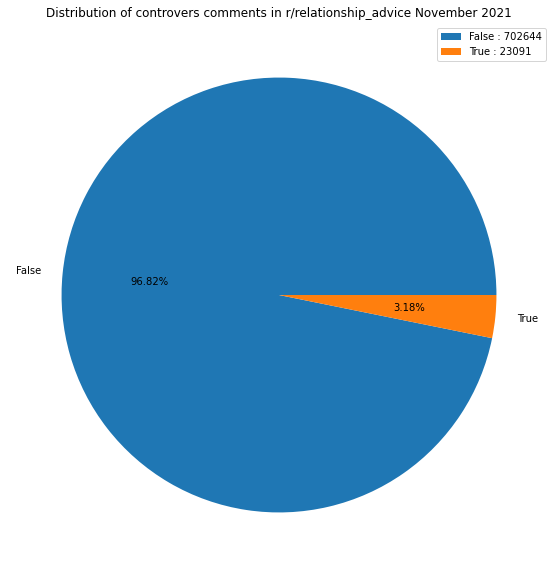

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))

# Plot Pie chart
pie_chart = df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=False)

# Get counts for each category
value_counts = df["controversiality"].value_counts()

# Create a custom legend with counts
legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
ax.legend(legend_labels, loc="upper right")

# Print the value counts
print(value_counts)

plt.title("Distribution of controvers comments in r/relationship_advice November 2021")
plt.ylabel('')  # Remove y-axis label for clarity

# How many submissions (link_id)

In [7]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 52456


# Which submission have the most interaction/comments

t3_qmkx9x    1111
t3_r150dl    1050
t3_qr0iad     949
t3_qy94fj     937
t3_qq45qb     903
             ... 
t3_r25xuz       1
t3_qtjdzg       1
t3_r25unw       1
t3_qtj91q       1
t3_r60x6t       1
Name: link_id, Length: 52456, dtype: int64


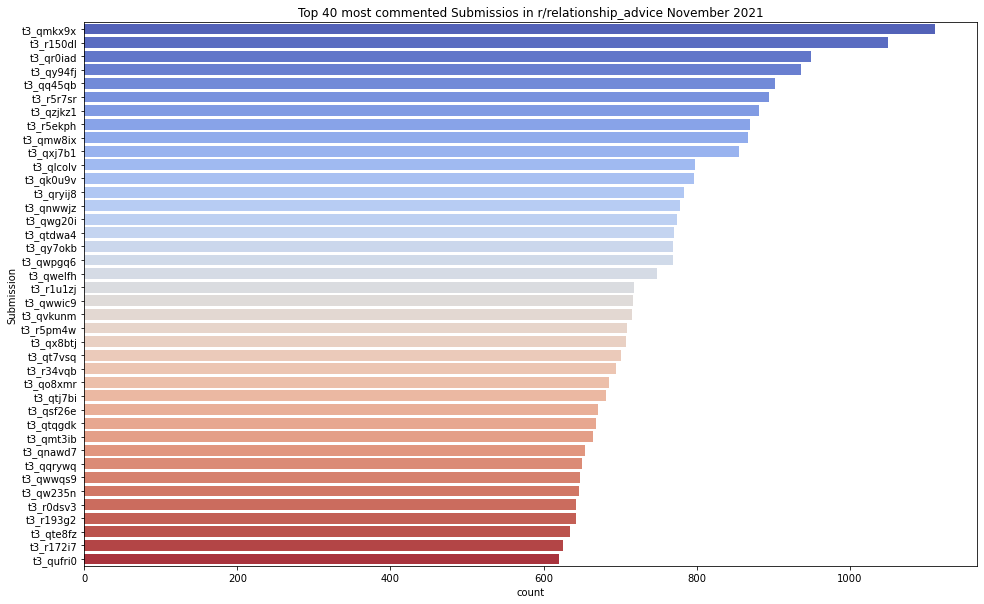

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)

# Ändere die Beschriftung von "link_id" zu "Submission"
plt.ylabel("Submission")
plt.title("Top 40 most commented Submissios in r/relationship_advice November 2021")

# Drucke die Wertezählungen für die neue Beschriftung
print(df["link_id"].value_counts())


t3_qmkx9x    1111
t3_r150dl    1050
t3_qr0iad     949
t3_qy94fj     937
t3_qq45qb     903
             ... 
t3_r25xuz       1
t3_qtjdzg       1
t3_r25unw       1
t3_qtj91q       1
t3_r60x6t       1
Name: link_id, Length: 52456, dtype: int64


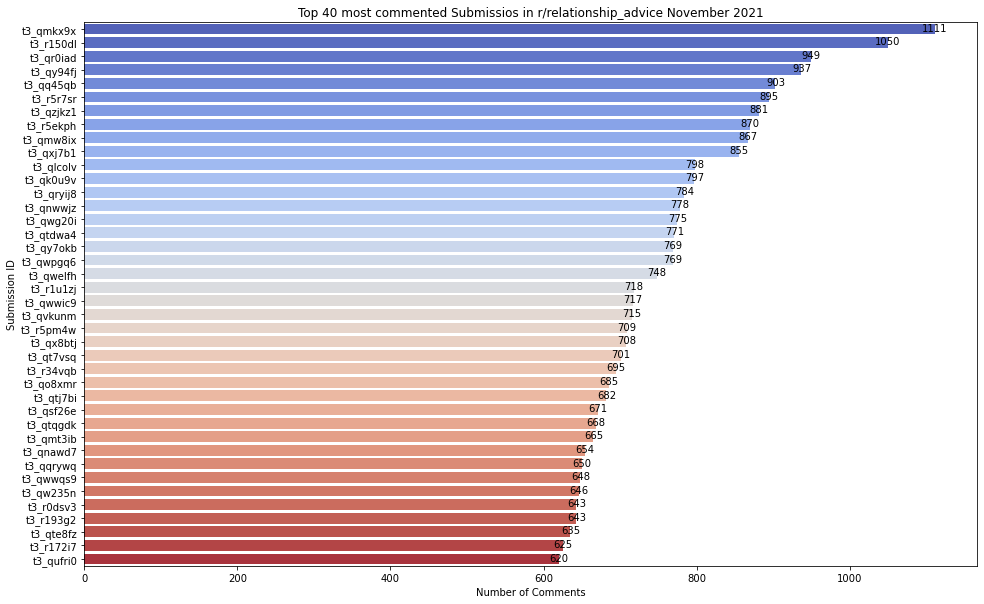

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index, ax=ax)

# Ändere die Beschriftung von "link_id" zu "Submission"
ax.set_ylabel("Submission ID")
ax.set_xlabel("Number of Comments")
plt.title("Top 40 most commented Submissios in r/relationship_advice November 2021")

# Anzeige der Anzahl in den Bars
for p in ax.patches:
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2 - 0.1, 
            f'{int(p.get_width())}', ha='center', va='center')

# Drucke die Wertezählungen für die neue Beschriftung
print(df["link_id"].value_counts())







# Average number of Comments per Submission per day

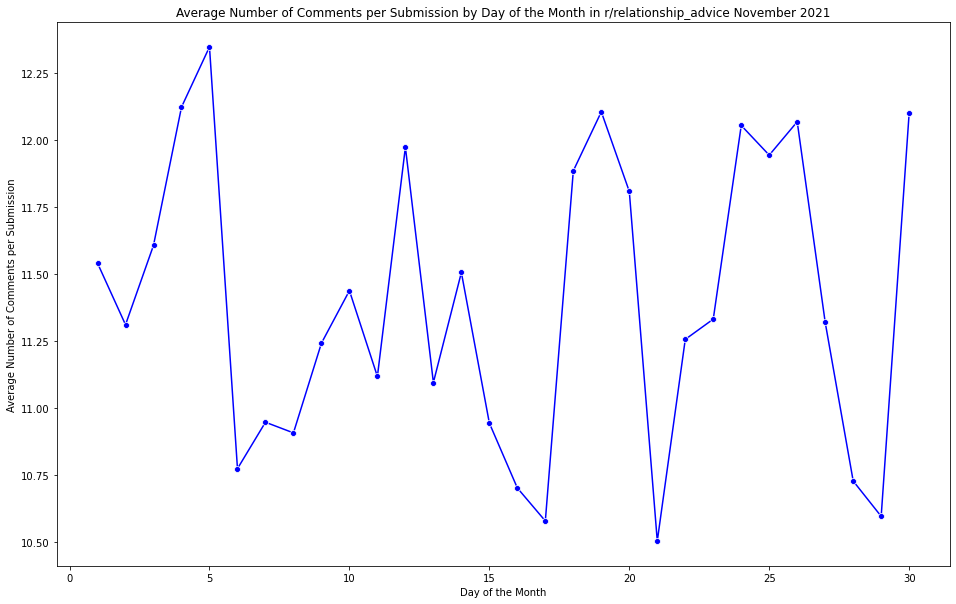

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per link_id for each day
avg_comments_per_link_id = df.groupby(['created_day', 'link_id']).size().groupby('created_day').mean().reset_index(name='avg_comments')

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_link_id, x='created_day', y='avg_comments', marker='o', color='blue')

plt.title('Average Number of Comments per Submission by Day of the Month in r/relationship_advice November 2021')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Comments per Submission')
plt.show()


# Average number of Comments per Submission per h

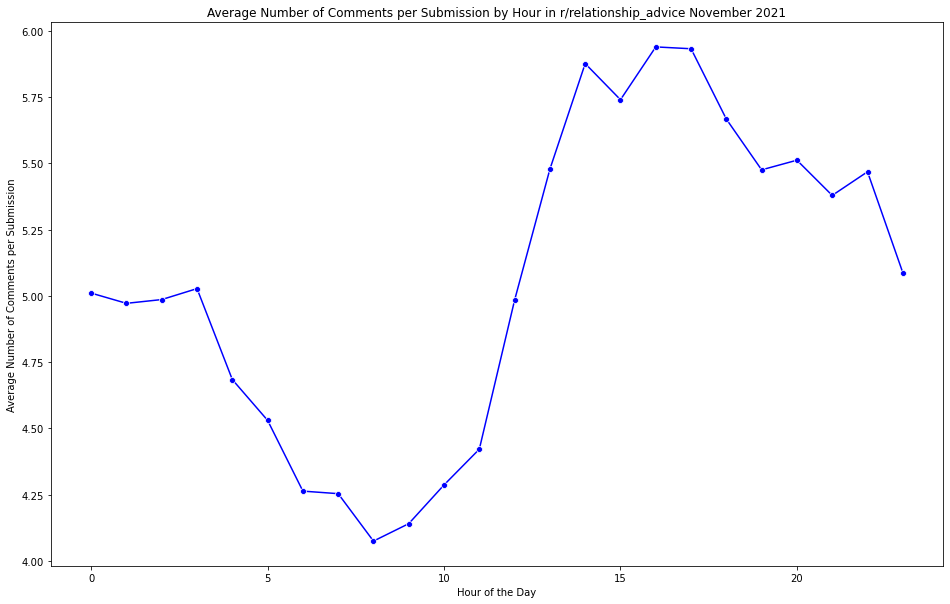

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per link_id for each hour
avg_comments_per_link_id_hourly = df.groupby(['created_hour', 'link_id']).size().groupby('created_hour').mean().reset_index(name='avg_comments')

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_link_id_hourly, x='created_hour', y='avg_comments', marker='o', color='blue')

plt.title('Average Number of Comments per Submission by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments per Submission')
plt.show()


# Author

# Who are the Authors/users with the most comments?

# With deleted

Text(0.5, 1.0, 'Top 20 users with the most comments in r/relationship_advice November 2021')

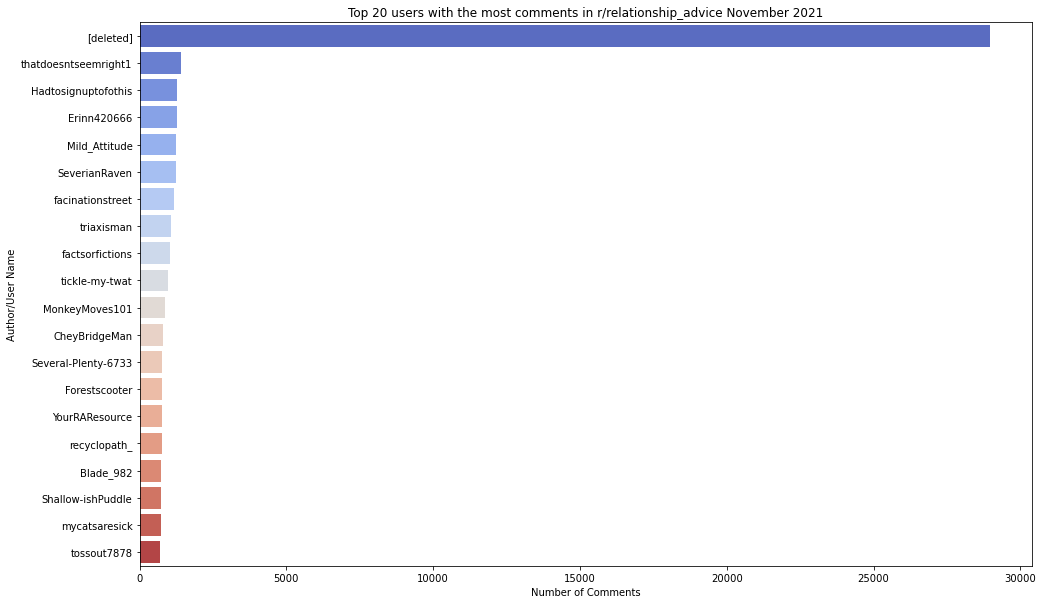

In [12]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)
plt.xlabel("Number of Comments")
plt.ylabel("Author/User Name")
plt.title("Top 20 users with the most comments in r/relationship_advice November 2021")


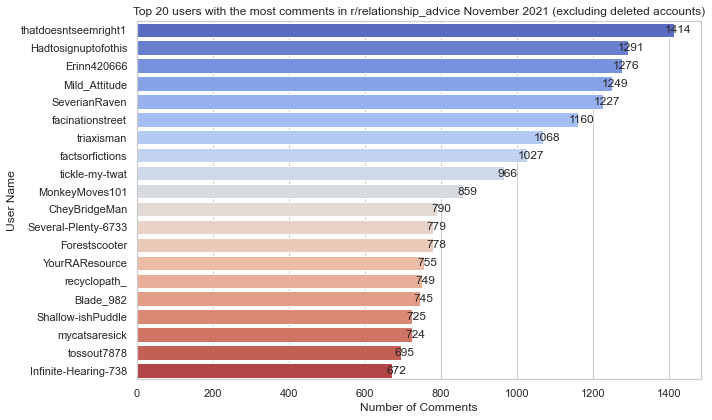

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("User Name")
plt.title("Top 20 users with the most comments in r/relationship_advice November 2021 (excluding deleted accounts)")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [14]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 120446


In [15]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 13.84


In [16]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 6.03


# The average number of comments per author per hour

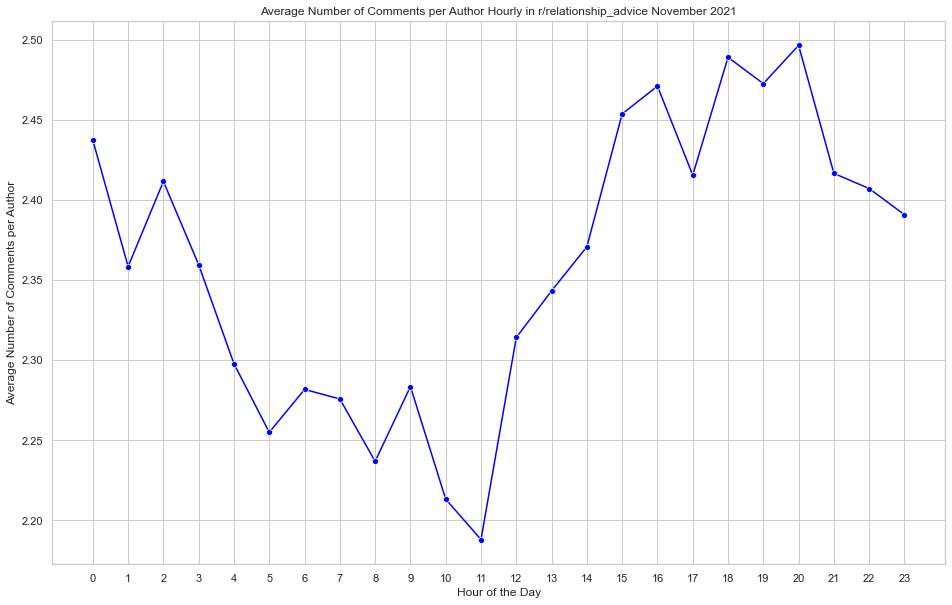

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per author for each hour
avg_comments_per_author_hourly = df.groupby(['created_hour', 'author']).size().groupby('created_hour').mean().reset_index()

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_author_hourly, x='created_hour', y=0, marker='o', color='blue')

plt.title('Average Number of Comments per Author Hourly in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments per Author')
plt.xticks(range(24))  # Show all hour values
plt.show()


# The average number of comments per author per day

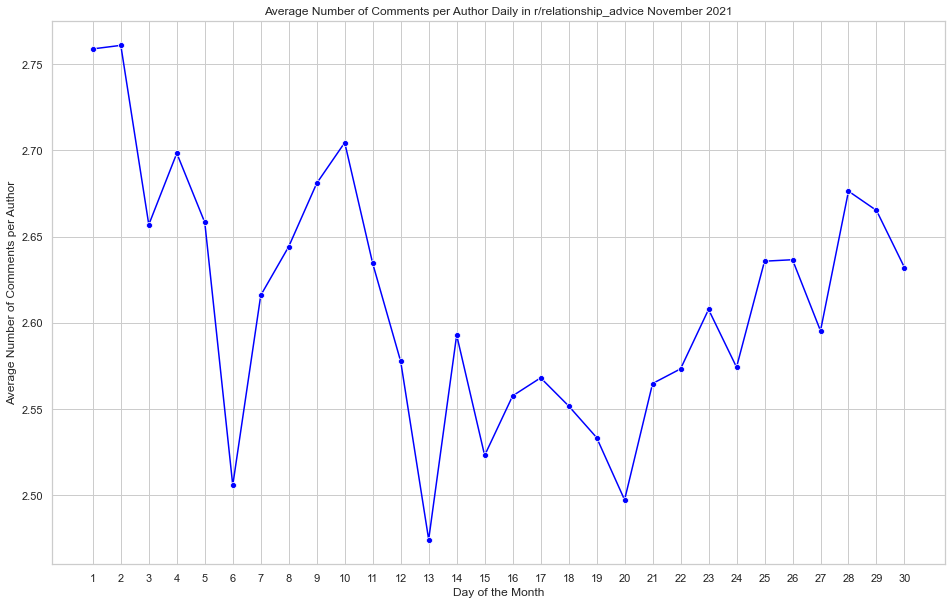

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per author for each day of the week
avg_comments_per_author_daily = df.groupby(['created_day', 'author']).size().groupby('created_day').mean().reset_index()

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_author_daily, x='created_day', y=0, marker='o', color='blue')

plt.title('Average Number of Comments per Author Daily in r/relationship_advice November 2021')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Comments per Author')
plt.xticks(range(1, 31))  # Show all day values
plt.show()


# Number of comments per hour

([<matplotlib.axis.XTick at 0x7f927aab16a0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

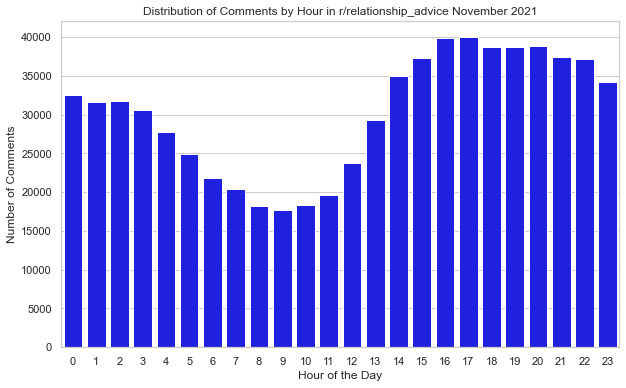

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Extract the hours from the "created_utc" column
# df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Create the Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Distribution of Comments by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(range(24))  # Set x-axis to hours


# Number of comments per day

Text(0, 0.5, 'Number of Comments')

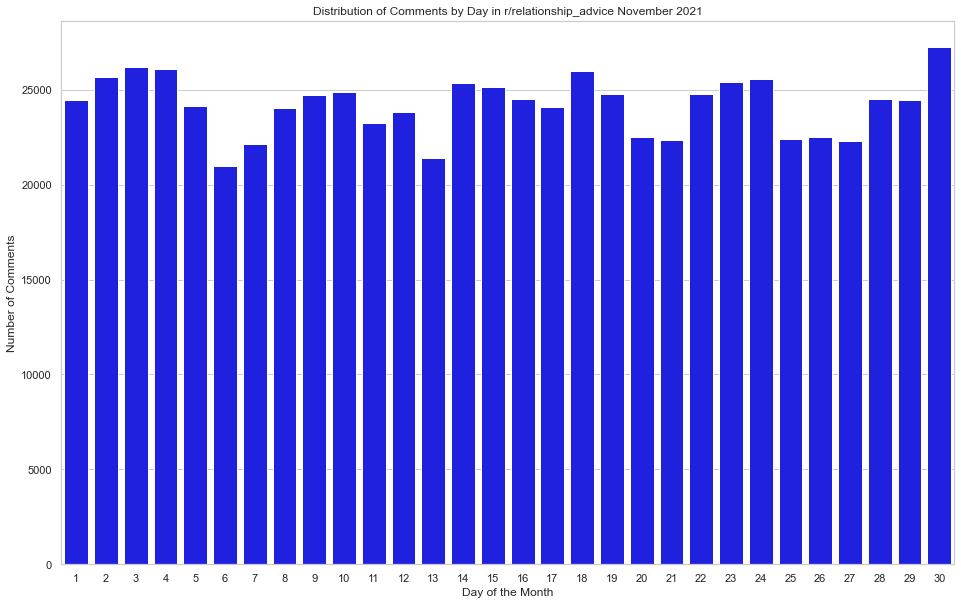

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Extract the hours from the "created_utc" column

# Create the Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Distribution of Comments by Day in r/relationship_advice November 2021')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Comments')


# How many comments are Edited

In [21]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    708829
True      16906
Name: edited, dtype: int64


Text(0, 0.5, '')

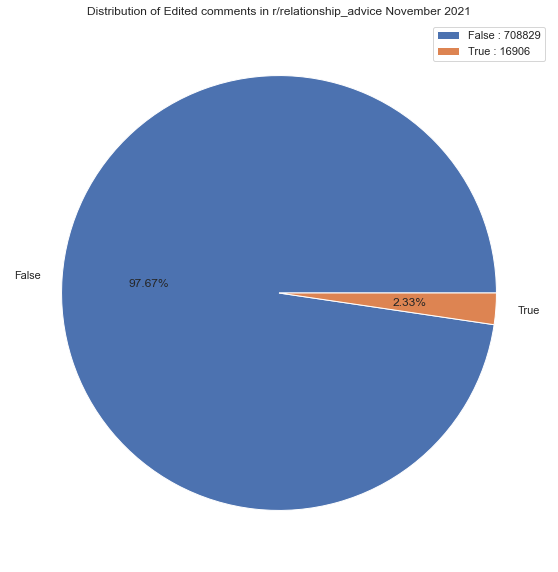

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))

# Plot Pie chart
pie_chart = df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=False)

# Get counts for each category
value_counts = df['edited'].value_counts()

# Create a custom legend with counts
legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
ax.legend(legend_labels, loc="upper right")

# Print the value counts
print(value_counts)

plt.title("Distribution of Edited comments in r/relationship_advice November 2021")
plt.ylabel('')  # Remove y-axis label for clarity


# Score Analysis

In [23]:
df["score"].mean()

12.12151680709901

In [24]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

author  Toxicity  Severe Toxicity  Profanity  \
214770             TMGThro  0.068963         0.002069   0.027274   
491930           Blade_982  0.181741         0.005531   0.039908   
622901             mawkish  0.016462         0.000625   0.012756   
133387     Elderberry-Girl  0.028149         0.001020   0.016685   
385170      throwaway28236  0.196944         0.007973   0.079995   
396557   PrettyPinkPeoni3s  0.437201         0.023077   0.262810   
413477  ModernWarfareScrub  0.854047         0.353682   0.880201   
451550      kawaiijudochop  0.235235         0.008888   0.113542   
49197    Party_Teacher6901  0.685292         0.419542   0.444313   
643698               xeevx  0.040926         0.001726   0.013337   

        Identity Attack    Insult    Threat author_flair_text  \
214770         0.004088  0.020837  0.007159                 0   
491930         0.016360  0.066347  0.041674                 0   
622901         0.001905  0.009603  0.006440                 0   
133387         0.003015  0.012111  0.007560                 0   
385170         0.017968  0.073018  0.025099                 0   
396557         0.073429  0.254041  0.062059                 0   
413477         0.102216  0.483992  0.043956                 0   
451550         0.008584  0.031918  0.131951                 0   
49197          0.102216  0.371660  0.603255                 0   
643698         0.002359  0.015873  0.007690                 0   

                                                     body  controversiality  \
214770  You've noticed the lighting in your bathroom i...             False   
491930  He strung her along for 9 years and is marryin...             False   
622901  Way above reddit's paygrade. Speak to a profes...             False   
133387  I think it doesn't sound like she did anything...             False   
385170  So he wants nothing to do with his flesh and b...             False   
396557  Find a new boyfriend. Someone that thinks a ra...             False   
413477  I've been incredibly fucked up on drugs and al...             False   
451550                                  Break up with him             False   
49197   Oh yeah, they couldn't have done much...just a...             False   
643698              This is above our pay grade. THERAPY.             False   

        ...  parent_id  score  stickied  created_hour created_day  \
214770  ...  t3_qqd1yo  10177     False            21           9   
491930  ...  t3_qyqipa   9810     False             8          21   
622901  ...  t3_r2vfum   8489     False            20          26   
133387  ...  t3_qnwwjz   8107     False             9           6   
385170  ...  t3_qvieee   6293     False            22          16   
396557  ...  t3_qvxjir   6193     False            11          17   
413477  ...  t3_qwelfh   6162     False             2          18   
451550  ...  t3_qxjkh9   5921     False            16          19   
49197   ...  t3_qlg2c3   5809     False            23           2   
643698  ...  t3_r3jybl   5782     False            18          27   

       created_year                                         clean_text  \
214770         2021  You ve noticed the lighting in your bathroom i...   
491930         2021  He strung her along for years and is marrying ...   
622901         2021  Way above reddit s paygrade . Speak to a profe...   
133387         2021  I think it doesn t sound like she did anything...   
385170         2021  So he wants nothing to do with his flesh and b...   
396557         2021  Find a new boyfriend . Someone that thinks a r...   
413477         2021  I ve been incredibly fucked up on drugs and al...   
451550         2021                                  Break up with him   
49197          2021  Oh yeah they couldn t have done much ... just ...   
643698         2021            This is above our pay grade . THERAPY .   

        comment_len  compound  Sentiment  
214770           61    0.9196          1  
491930           60    0

In [25]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

author  Toxicity  Severe Toxicity  Profanity  \
718887        throwRA088775  0.176317         0.006638   0.089370   
33864   X_SuperTerrorizer_X  0.279753         0.014382   0.265901   
471108          psycologina  0.105230         0.001993   0.048175   
318751       themanasdaskid  0.259157         0.007744   0.073852   
312852  ThrowRAresentment32  0.320209         0.008698   0.266212   
412292         pond-dweller  0.247637         0.007896   0.197706   
342478     SocialistLunatic  0.491397         0.170092   0.473824   
222702         Grumpy_Troll  0.825221         0.349699   0.675090   
604968   Accurate_Mine_9864  0.397729         0.012054   0.252758   
352097   Throwaway154542741  0.039463         0.001526   0.021057   

        Identity Attack    Insult    Threat author_flair_text  \
718887         0.010655  0.027347  0.016983                 0   
33864          0.008621  0.035995  0.008816                 0   
471108         0.008694  0.024253  0.008764                 0   
318751         0.224585  0.085828  0.010758                 0   
312852         0.018370  0.269578  0.010525                 0   
412292         0.019676  0.130648  0.011250                 0   
342478         0.159452  0.339302  0.179648                 0   
222702         0.102216  0.667732  0.040293     Late 30s Male   
604968         0.012441  0.425680  0.045895                 0   
352097         0.004347  0.015265  0.007068                 0   

                                                     body  controversiality  \
718887  If she was to break up with me and find someon...             False   
33864    You sound like a good friend that's genuinely...             False   
471108  BecauSe I take marriage very seriously and I h...             False   
318751  So you’re telling women need to deal with thei...             False   
312852  I didn't abandon them. I didn't leave my famil...             False   
412292  I am humiliated because I was mistaken when I ...             False   
342478  Nah I'm 16 and I would manage this pretty easi...             False   
222702  This guy's a huge asshole, but assuming they a...             False   
604968  embezzlement is a criminal offense here, subje...             False   
352097  Because somehow I had hoped that people change...             False   

        ...   parent_id score  stickied  created_hour created_day  \
718887  ...  t1_hmozk0q -1114     False            18          30   
33864   ...  t1_hizf345  -787     False            11           2   
471108  ...  t1_hldghpk  -761     False            11          20   
318751  ...  t1_hkk23d3  -736     False             6          14   
312852  ...  t1_hkixhhd  -663     False             0          14   
412292  ...  t1_hl1yw5p  -662     False             1          18   
342478  ...  t1_hko09i2  -649     False             4          15   
222702  ...  t1_hk0e3p7  -637     False             3          10   
604968  ...  t1_hm334ru  -618     False             0          26   
352097  ...  t1_hkqctnu  -610     False            16          15   

       created_year                                         clean_text  \
718887         2021  If she was to break up with me and find someon...   
33864          2021  You sound like a good friend that s genuinely ...   
471108         2021  BecauSe I take marriage very seriously and I h...   
318751         2021  So you re telling women need to deal with thei...   
312852         2021  I didn t abandon them . I didn t leave my fami...   
412292         2021  I am humiliated because I was mistaken when I ...   
342478         2021  Nah I m and I would manage this pretty easily ...   
222702         2021  This guy s a huge asshole but assuming they ar...   
604968         2021  embezzlement is a criminal offense here subjec...   
352097         2021  Because somehow I had hoped that people change...   

        comment_len  compound  Sentiment  
718887           28    0.0772          1  
33864         

# On which hour the scores are the highes or lowest

Text(0, 0.5, 'Average Score')

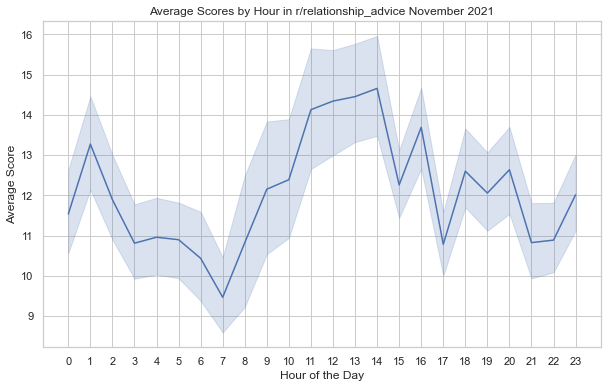

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))

# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="score")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Score')




([<matplotlib.axis.XTick at 0x7f9260058fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

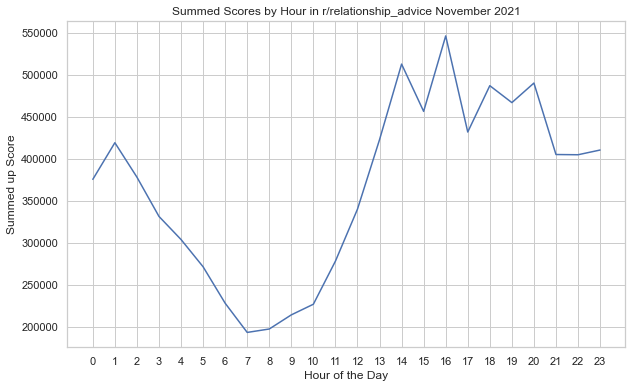

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["score"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="score")

plt.title('Summed Scores by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Score')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an



# On which day the scores are the highes or lowest

Text(0, 0.5, 'Average Score')

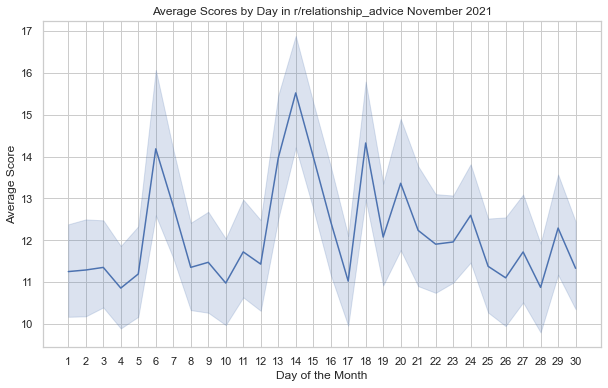

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))

# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationship_advice November 2021')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')

([<matplotlib.axis.XTick at 0x7f9248082be0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

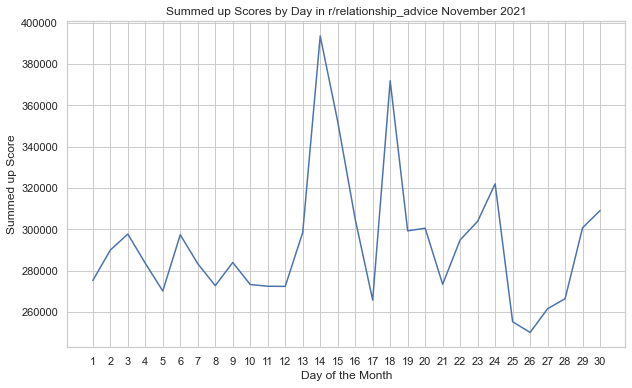

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_day")["score"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_day", y="score")

plt.title('Summed up Scores by Day in r/relationship_advice November 2021')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Score')
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

# Which Author have the most scores

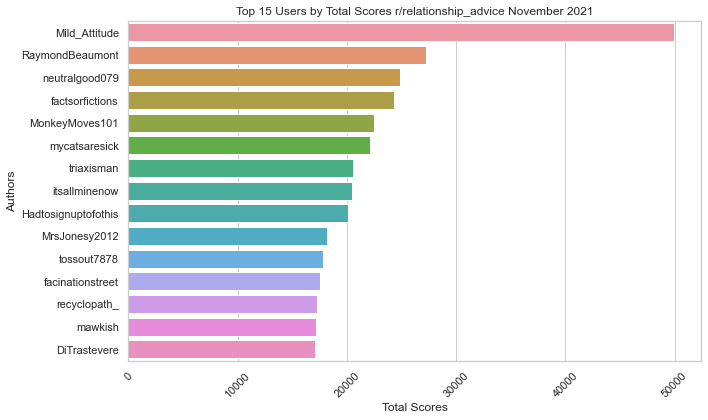

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame with the corresponding columns
# Make sure to use the same DataFrame name

# Group authors by total scores
author_scores = df.groupby('author')['score'].sum()

# Sort authors by total scores in descending order
sorted_authors = author_scores.sort_values(ascending=False)

# Remove the first author from the sorted list
sorted_authors = sorted_authors.iloc[2:]

# Select the top 15 authors
top_authors = sorted_authors.head(15)

# Create a plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Users by Total Scores r/relationship_advice November 2021')
plt.xlabel("Total Scores")
plt.ylabel("Authors")
plt.xticks(rotation=45)
plt.tight_layout()


# Sind Leute die mehr Edited mehr negative?

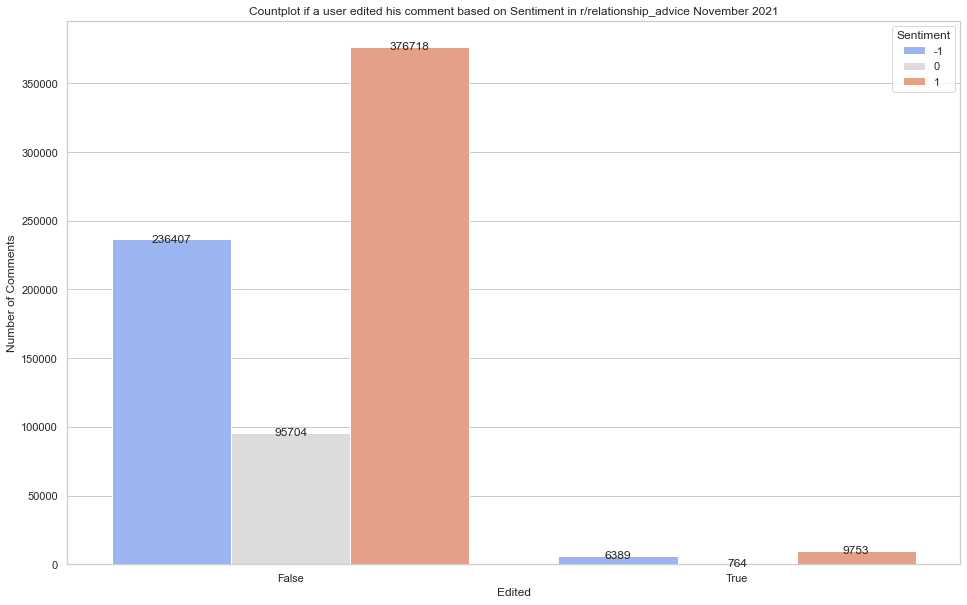

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Count the values and create a bar plot
sns.countplot(data=df, x='edited', palette='coolwarm', ax=ax,hue="Sentiment")

# Add labels
plt.title('Countplot if a user edited his comment based on Sentiment in r/relationship_advice November 2021')
plt.xlabel('Edited')
plt.ylabel('Number of Comments')

# Display the count above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='center')

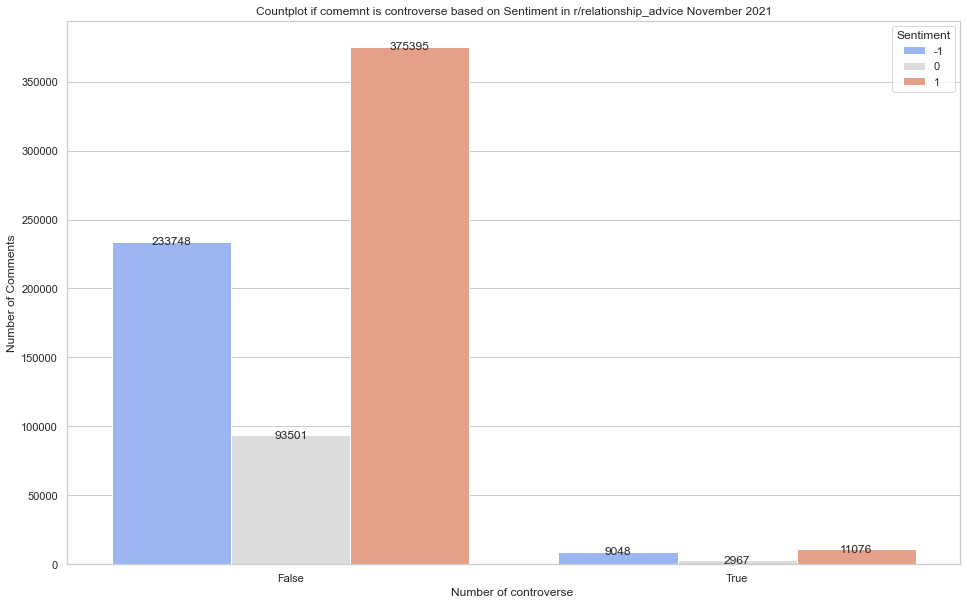

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Count the values and create a bar plot
sns.countplot(data=df, x='controversiality', palette='coolwarm', ax=ax,hue="Sentiment")

# Add labels
plt.title('Countplot if comemnt is controverse based on Sentiment in r/relationship_advice November 2021')
plt.xlabel('Number of controverse ')
plt.ylabel('Number of Comments')

# Display the count above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='center')

# Sentiment  Analyses

# Durchschnittliche Vader Sentiment score für 2021

In [33]:
df["compound"].mean()

0.14804674750420457

# Vader Sentiment coutplot

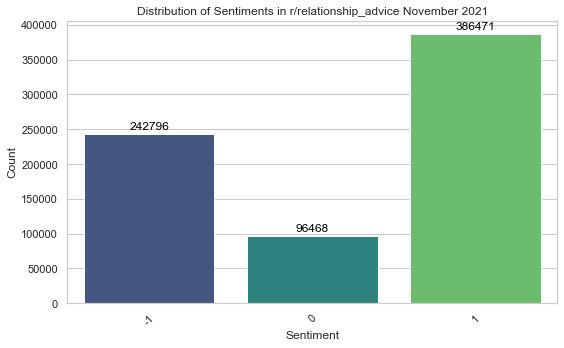

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments in r/relationship_advice November 2021')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()


# Prozentuale Verteilung von Vader Sentiment

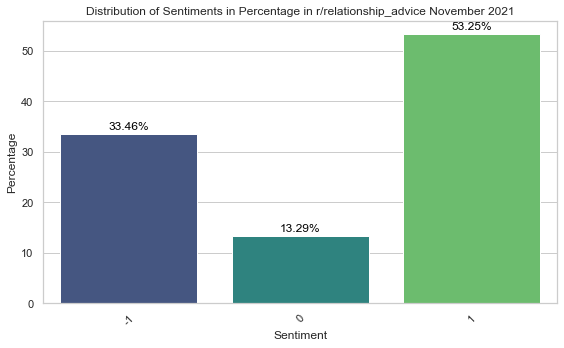

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage in r/relationship_advice November 2021')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()

# Verteilung des Compound scores

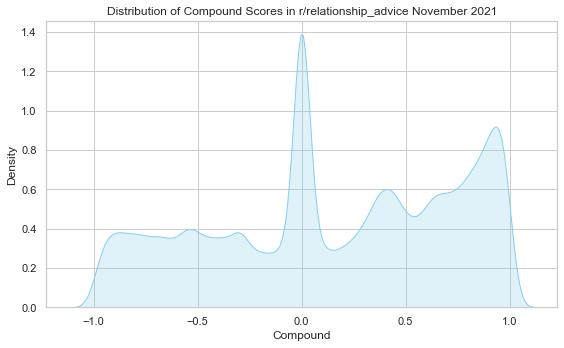

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores in r/relationship_advice November 2021')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()

# An welchen Tag sind die Kommentare durchschnittlich am negativsten bzw positivesten

([<matplotlib.axis.XTick at 0x7f92485d07f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

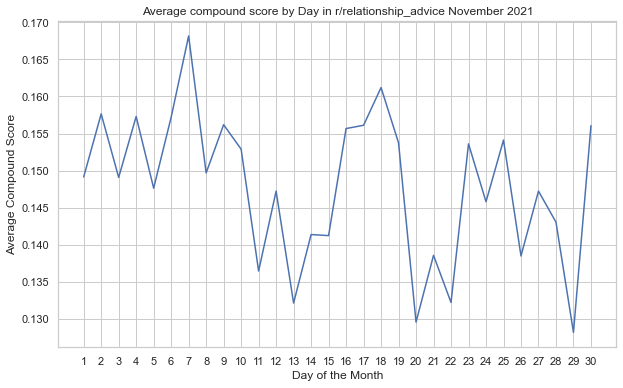

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_day")['compound'].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_day", y="compound")

plt.title('Average compound score by Day in r/relationship_advice November 2021')
plt.xlabel('Day of the Month')
plt.ylabel('Average Compound Score')
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

# An welcher stunde sind die Kommentare im durchschnitt am negativsten oder positivsten

([<matplotlib.axis.XTick at 0x7f9258f6a160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

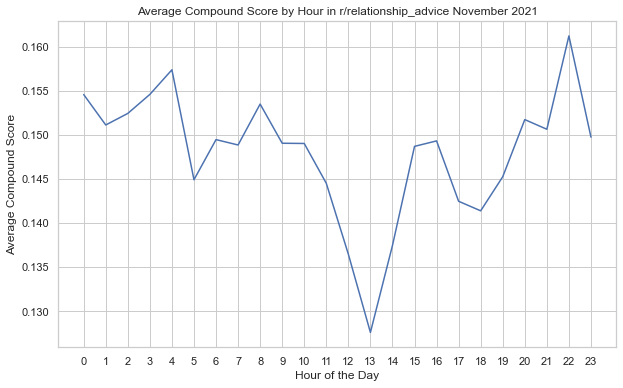

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")['compound'].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="compound")

plt.title('Average Compound Score by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel("Average Compound Score")
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

# Zu welcher Zeit haben negative, positive und neutrale kommentare im Durchschnitt den höchsten scoren

Text(0, 0.5, 'Average Score')

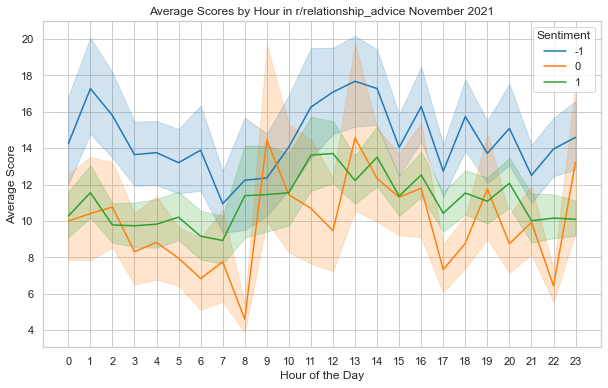

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Score')

Text(0, 0.5, 'Average Score')

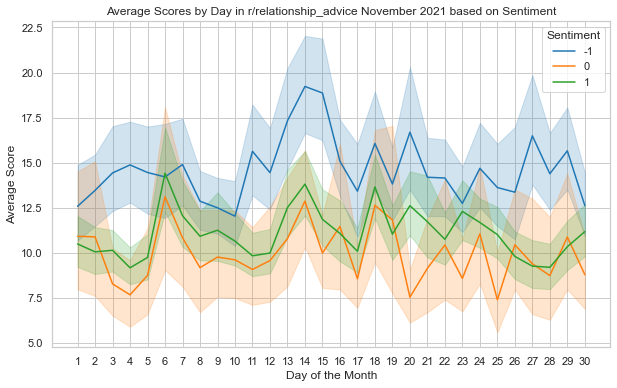

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationship_advice November 2021 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')


Text(0, 0.5, 'Average Score')

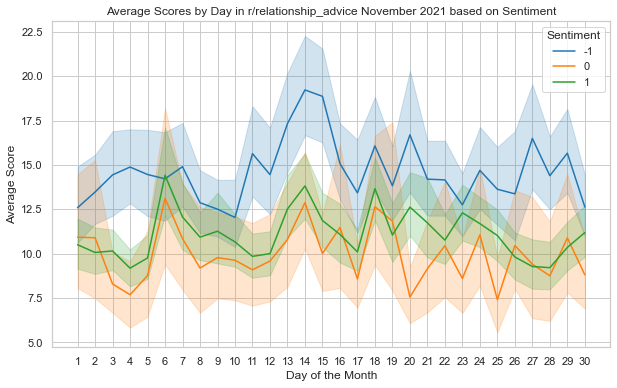

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationship_advice November 2021 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')

Text(0, 0.5, 'Summed up Score')

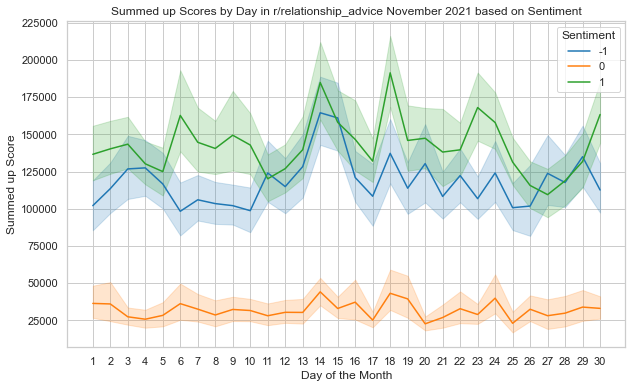

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_day", y="score", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all hour values

plt.title('Summed up Scores by Day in r/relationship_advice November 2021 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Score')

<AxesSubplot:xlabel='Sentiment', ylabel='score'>

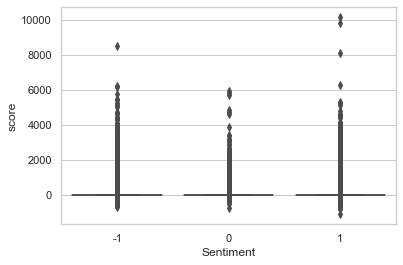

In [43]:
sns.boxplot(data=df, y="score", x="Sentiment")

<AxesSubplot:xlabel='Sentiment', ylabel='comment_len'>

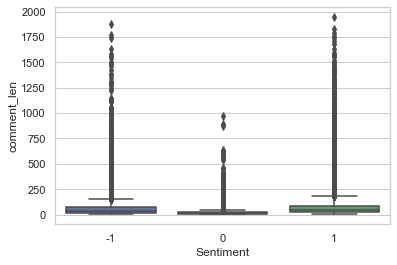

In [44]:
sns.boxplot(data=df, y="comment_len", x="Sentiment")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725735 entries, 0 to 725734
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             725735 non-null  object 
 1   Toxicity           711910 non-null  float64
 2   Severe Toxicity    711910 non-null  float64
 3   Profanity          711910 non-null  float64
 4   Identity Attack    711910 non-null  float64
 5   Insult             711910 non-null  float64
 6   Threat             711910 non-null  float64
 7   author_flair_text  725735 non-null  object 
 8   body               725735 non-null  object 
 9   controversiality   725735 non-null  bool   
 10  created_utc        725735 non-null  object 
 11  distinguished      725735 non-null  object 
 12  edited             725735 non-null  bool   
 13  gilded             725735 non-null  int64  
 14  id                 725735 non-null  object 
 15  link_id            725735 non-null  object 
 16  pa

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725735 entries, 0 to 725734
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             725735 non-null  object 
 1   Toxicity           711910 non-null  float64
 2   Severe Toxicity    711910 non-null  float64
 3   Profanity          711910 non-null  float64
 4   Identity Attack    711910 non-null  float64
 5   Insult             711910 non-null  float64
 6   Threat             711910 non-null  float64
 7   author_flair_text  725735 non-null  object 
 8   body               725735 non-null  object 
 9   controversiality   725735 non-null  bool   
 10  created_utc        725735 non-null  object 
 11  distinguished      725735 non-null  object 
 12  edited             725735 non-null  bool   
 13  gilded             725735 non-null  int64  
 14  id                 725735 non-null  object 
 15  link_id            725735 non-null  object 
 16  pa

# Comment lengt

In [47]:
df["comment_len"].mean()

56.79680324085238

In [48]:
df["comment_len"].median()

36.0

([<matplotlib.axis.XTick at 0x7f92aae227c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

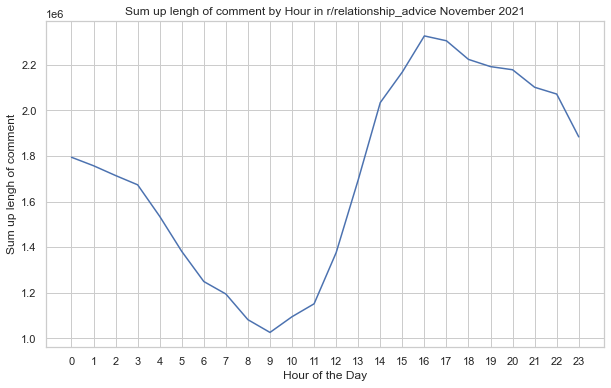

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["comment_len"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="comment_len")

plt.title('Sum up lengh of comment by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum up lengh of comment')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

([<matplotlib.axis.XTick at 0x7f92ab3f36d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

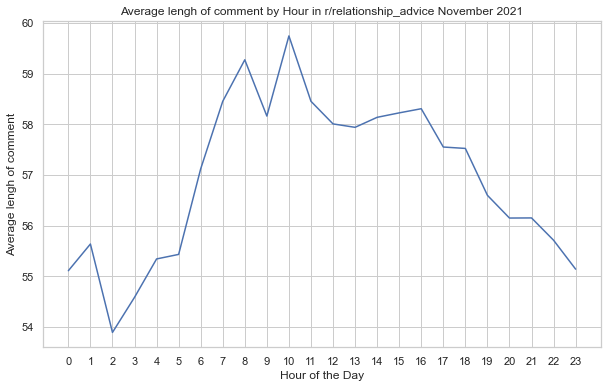

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["comment_len"].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="comment_len")

plt.title('Average lengh of comment by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average lengh of comment')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

Text(0, 0.5, 'Average Comment Length')

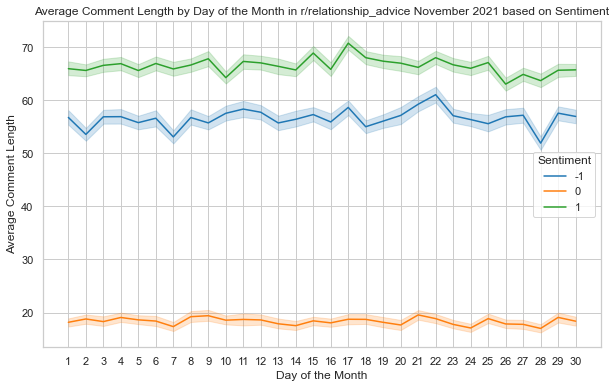

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart for comment length
sns.lineplot(data=df, x="created_day", y="comment_len", hue="Sentiment", palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all day values

plt.title('Average Comment Length by Day of the Month in r/relationship_advice November 2021 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Comment Length')



Text(0, 0.5, 'Average Comment Length')

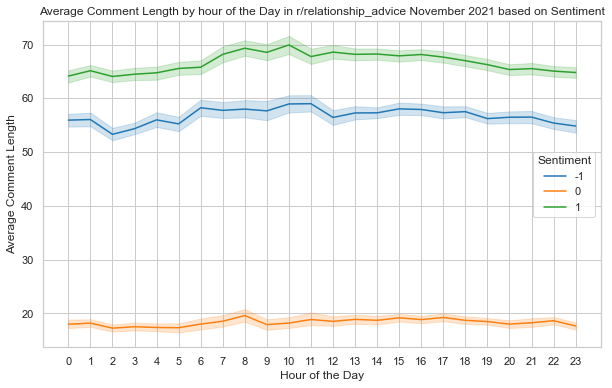

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart for comment length
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all day values

plt.title('Average Comment Length by hour of the Day in r/relationship_advice November 2021 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Comment Length')

Text(0, 0.5, 'Summed up Comment length')

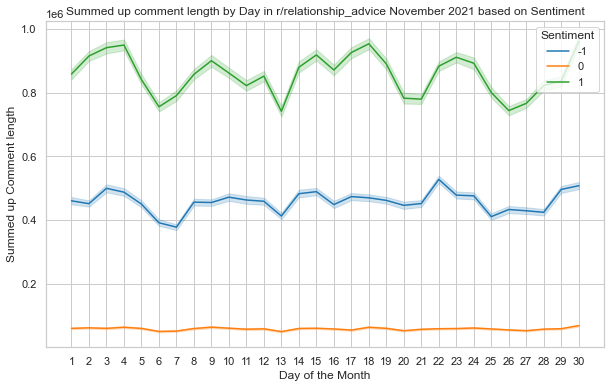

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_day", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all hour values

plt.title('Summed up comment length by Day in r/relationship_advice November 2021 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Comment length')

Text(0, 0.5, 'Summed up Comment length')

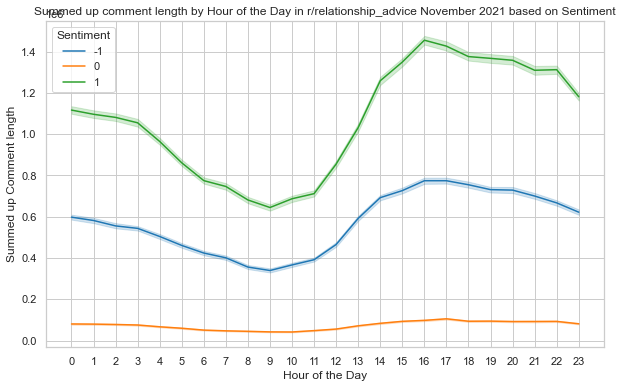

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all hour values

plt.title('Summed up comment length by Hour of the Day in r/relationship_advice November 2021 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Comment length')

Text(0, 0.5, 'Summed up Comment length')

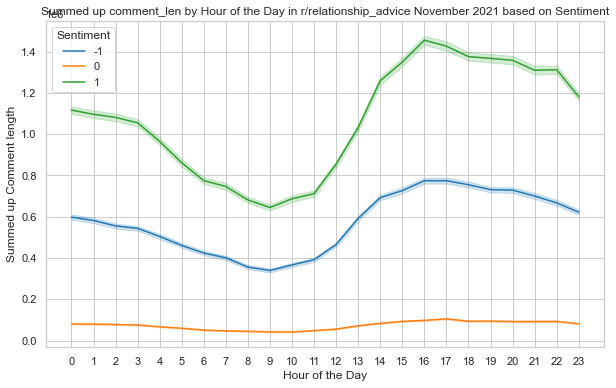

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all hour values

plt.title('Summed up comment_len by Hour of the Day in r/relationship_advice November 2021 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Comment length')

# Toxicity 

In [56]:
import pandas as pd

# Annahme: DataFrame df enthält die Spalten "comment_len", "compound" und "Toxicity"

# Filtere die Zeilen, in denen "Toxicity" keinen Wert hat
filtered_df = df[df['Toxicity'].isnull()]

# Berechne den Durchschnitt von "comment_len" und "compound" für die gefilterten Zeilen
mean_comment_len = filtered_df['comment_len'].mean()
mean_compound_score = filtered_df['compound'].mean()

print(f'Mean Comment Length (where Toxicity is null): {mean_comment_len}')
print(f'Mean Compound Score (where Toxicity is null): {mean_compound_score}')


Mean Comment Length (where Toxicity is null): 3.966509945750452
Mean Compound Score (where Toxicity is null): 0.0932102712477389


Text(0, 0.5, 'Count')

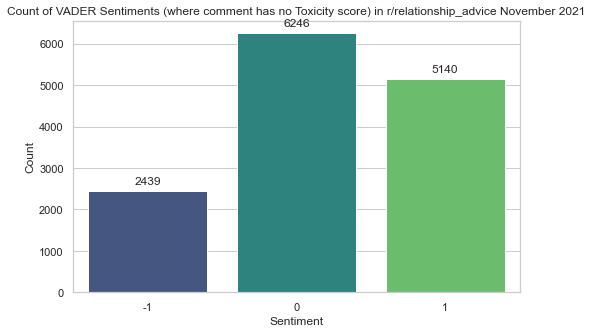

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: filtered_df ist dein gefiltertes DataFrame mit der Spalte "sentiment"

# Erstelle das Countplot für die Spalte "sentiment"
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_df, x='Sentiment', palette='viridis')

# Beschrifte die Balken mit den genauen Zahlen
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of VADER Sentiments (where comment has no Toxicity score) in r/relationship_advice November 2021')
plt.xlabel('Sentiment')
plt.ylabel('Count')





Text(0, 0.5, 'Percentage')

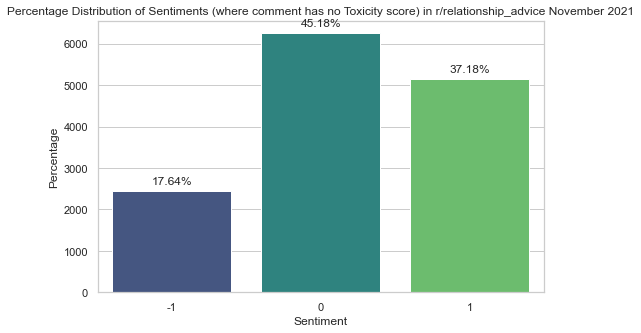

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: filtered_df ist dein gefiltertes DataFrame mit der Spalte "Sentiment"

# Berechne die prozentualen Anteile für jeden Sentiment-Wert
total_count = len(filtered_df)
percentages = (filtered_df['Sentiment'].value_counts() / total_count) * 100

# Erstelle das Countplot für die Spalte "Sentiment"
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_df, x='Sentiment', palette='viridis')

# Beschrifte die Balken mit den prozentualen Anteilen
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total_count * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Percentage Distribution of Sentiments (where comment has no Toxicity score) in r/relationship_advice November 2021')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')




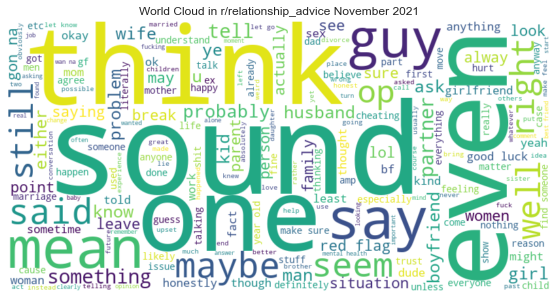

Text(0, 0.5, 'Count')

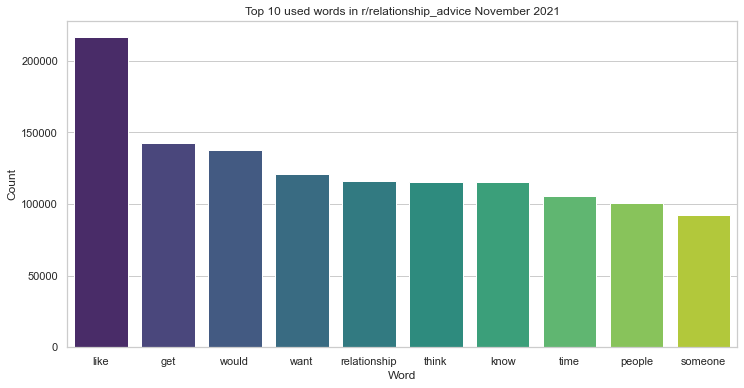

In [59]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns

# Assuming you already have a DataFrame named "df" with a column named "body"
# Make sure that nltk, wordcloud, seaborn, and matplotlib are installed
# Install them with: pip install nltk wordcloud seaborn matplotlib

# Load English stopwords
stop_words = set(stopwords.words("english"))

# Combine all texts in the "body" column into a single text and remove stopwords
df["body_clean"] = df["clean_text"].apply(lambda x: " ".join([word.lower() for word in word_tokenize(str(x)) if word.isalpha() and word.lower() not in stop_words]))

# Combine all cleaned texts into a single text
text = " ".join(df["body_clean"])

# Create the Word Cloud using the WordCloud library
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.title("World Cloud in r/relationship_advice November 2021")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Create a Countplot for the Top 10 words
top_words = Counter(text.split()).most_common(10)
top_words_df = pd.DataFrame(top_words, columns=["Word", "Count"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Count", data=top_words_df, palette="viridis")
plt.title("Top 10 used words in r/relationship_advice November 2021")
plt.xlabel("Word")
plt.ylabel("Count")



# Toxicity Analyses

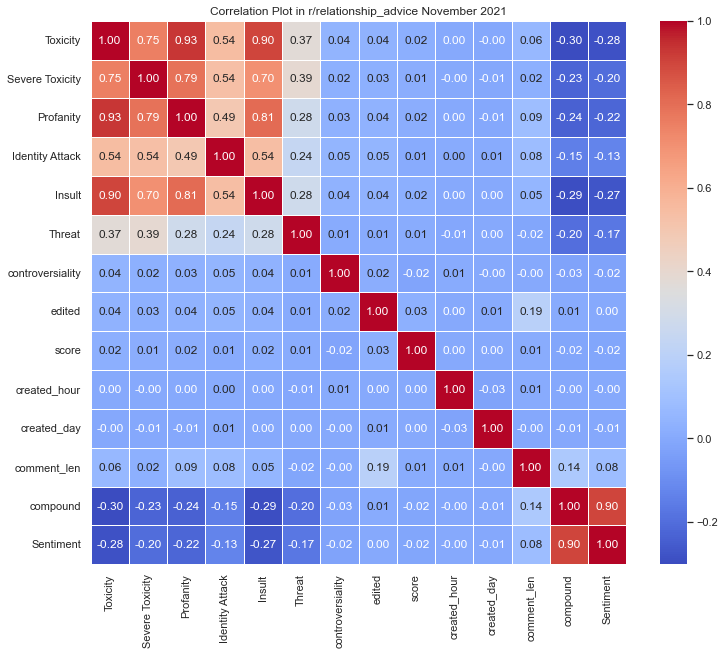

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: df ist dein DataFrame

# Entferne die Spalten created_year, created_hour, und created_day
columns_to_exclude = ['created_year',"gilded","author_flair_text","stickied","distinguished"]
df_filtered = df.drop(columns=columns_to_exclude, errors='ignore')

# Berechne die Korrelationsmatrix
correlation_matrix = df_filtered.corr()

# Erstelle den Korrelationsplot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Plot in r/relationship_advice November 2021')
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725735 entries, 0 to 725734
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             725735 non-null  object 
 1   Toxicity           711910 non-null  float64
 2   Severe Toxicity    711910 non-null  float64
 3   Profanity          711910 non-null  float64
 4   Identity Attack    711910 non-null  float64
 5   Insult             711910 non-null  float64
 6   Threat             711910 non-null  float64
 7   author_flair_text  725735 non-null  object 
 8   body               725735 non-null  object 
 9   controversiality   725735 non-null  bool   
 10  created_utc        725735 non-null  object 
 11  distinguished      725735 non-null  object 
 12  edited             725735 non-null  bool   
 13  gilded             725735 non-null  int64  
 14  id                 725735 non-null  object 
 15  link_id            725735 non-null  object 
 16  pa

In [62]:
import pandas as pd

# Angenommen, df ist dein DataFrame
# Wähle die relevanten Spalten aus
selected_columns = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# Erstelle eine neue Spalte für jeden Wert >= 0.7 (1 für True, 0 für False)
df['Toxicity_0.7_or_higher'] = (df['Toxicity'] >= 0.7).astype(int)
df['Severe_Toxicity_0.7_or_higher'] = (df['Severe Toxicity'] >= 0.7).astype(int)
df['Profanity_0.7_or_higher'] = (df['Profanity'] >= 0.7).astype(int)
df['Identity_Attack_0.7_or_higher'] = (df['Identity Attack'] >= 0.7).astype(int)
df['Insult_0.7_or_higher'] = (df['Insult'] >= 0.7).astype(int)
df['Threat_0.7_or_higher'] = (df['Threat'] >= 0.7).astype(int)

# Summiere die Anzahl der 1en für jede Spalte
count_toxicity = df['Toxicity_0.7_or_higher'].sum()
count_severe_toxicity = df['Severe_Toxicity_0.7_or_higher'].sum()
count_profanity = df['Profanity_0.7_or_higher'].sum()
count_identity_attack = df['Identity_Attack_0.7_or_higher'].sum()
count_insult = df['Insult_0.7_or_higher'].sum()
count_threat = df['Threat_0.7_or_higher'].sum()

# Drucke die Ergebnisse
print(f'Count of Toxicity >= 0.7: {count_toxicity}')
print(f'Count of Severe Toxicity >= 0.7: {count_severe_toxicity}')
print(f'Count of Profanity >= 0.7: {count_profanity}')
print(f'Count of Identity Attack >= 0.7: {count_identity_attack}')
print(f'Count of Insult >= 0.7: {count_insult}')
print(f'Count of Threat >= 0.7: {count_threat}')


Count of Toxicity >= 0.7: 38853
Count of Severe Toxicity >= 0.7: 185
Count of Profanity >= 0.7: 33079
Count of Identity Attack >= 0.7: 98
Count of Insult >= 0.7: 8014
Count of Threat >= 0.7: 135


In [63]:
import pandas as pd

# Angenommen, df ist dein DataFrame
# Wähle die relevanten Spalten aus
selected_columns = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# Erstelle eine neue Spalte für jeden Wert >= 0.7 (1 für True, 0 für False)
for col in selected_columns:
    df[f'{col}_0.7_or_higher'] = (df[col] >= 0.7).astype(int)

# Summiere die Anzahl der 1en für jede Spalte
counts = df[[f'{col}_0.7_or_higher' for col in selected_columns]].sum()

# Berechne den Prozentsatz im Verhältnis zur Gesamtanzahl der Zeilen
total_rows = len(df)
percentages = counts / total_rows * 100

# Drucke die prozentualen Ergebnisse
for col, percentage in zip(selected_columns, percentages):
    print(f'Percentage of {col} >= 0.7: {percentage:.3f}%')


Percentage of Toxicity >= 0.7: 5.354%
Percentage of Severe Toxicity >= 0.7: 0.025%
Percentage of Profanity >= 0.7: 4.558%
Percentage of Identity Attack >= 0.7: 0.014%
Percentage of Insult >= 0.7: 1.104%
Percentage of Threat >= 0.7: 0.019%


Text(0, 0.5, 'Average Toxicity Score')

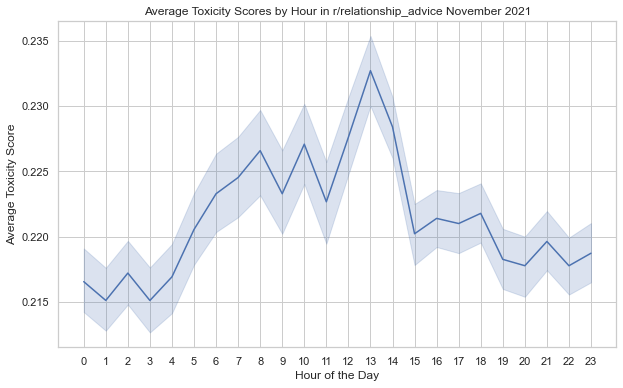

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Toxicity Scores by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Toxicity Score')

Text(0, 0.5, 'Average Toxicity Score')

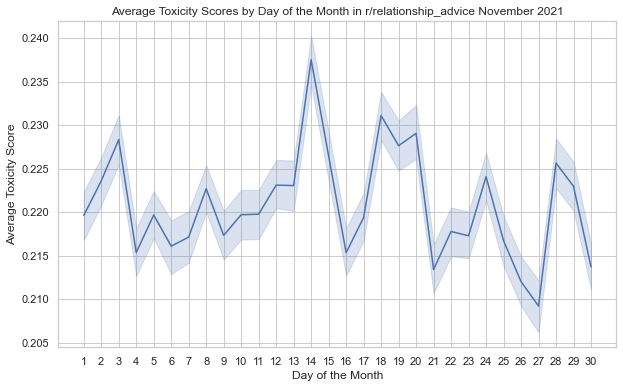

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Toxicity Scores by Day of the Month in r/relationship_advice November 2021')
plt.xlabel("Day of the Month")
plt.ylabel('Average Toxicity Score')

# Severe Toxicity

Text(0, 0.5, 'Average Severe Toxicity Score')

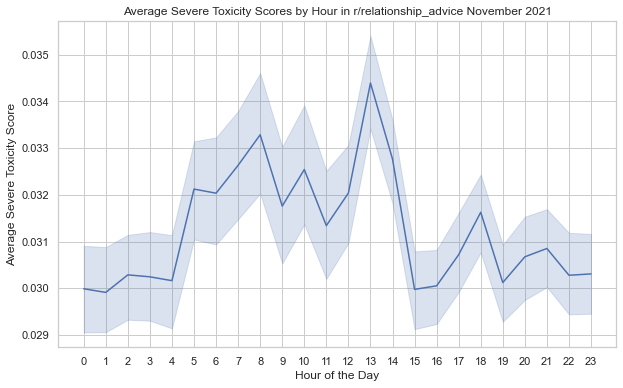

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Severe Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Severe Toxicity Scores by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Severe Toxicity Score')

Text(0, 0.5, 'Average Severe Toxicity Score')

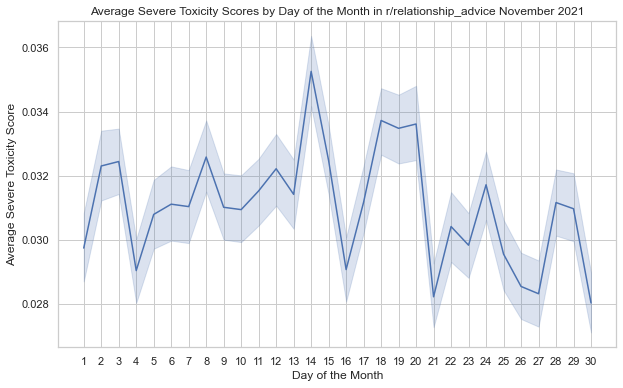

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Severe Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Severe Toxicity Scores by Day of the Month in r/relationship_advice November 2021')
plt.xlabel("Day of the Month")
plt.ylabel('Average Severe Toxicity Score')

# Profanity

Text(0, 0.5, 'Average Profanity Score')

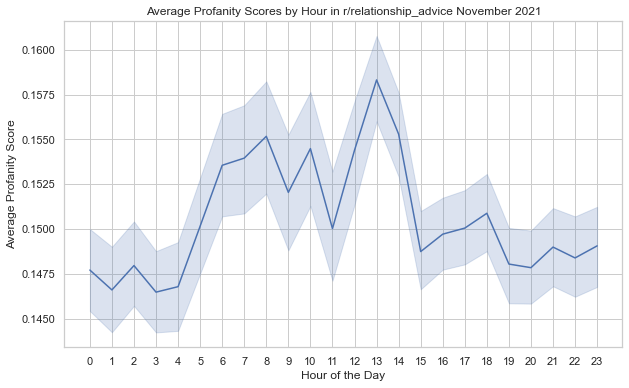

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Profanity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Profanity Scores by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Profanity Score')

Text(0, 0.5, 'Average Profanity Score')

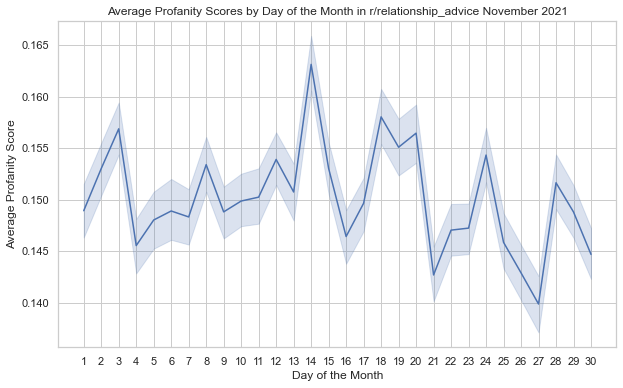

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Profanity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Profanity Scores by Day of the Month in r/relationship_advice November 2021')
plt.xlabel("Day of the Month")
plt.ylabel('Average Profanity Score')

# Identity Attack

Text(0, 0.5, 'Average Identity Attack Score')

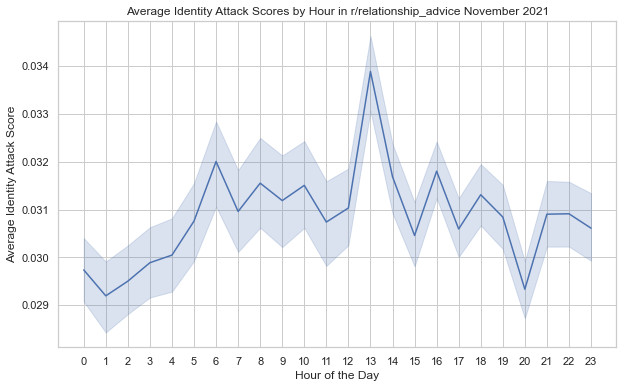

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Identity Attack",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Identity Attack Scores by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Identity Attack Score')

Text(0, 0.5, 'Average Identity Attack Score')

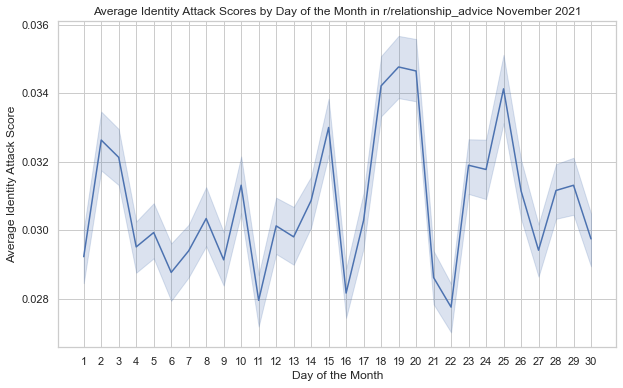

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Identity Attack",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Identity Attack Scores by Day of the Month in r/relationship_advice November 2021')
plt.xlabel("Day of the Month")
plt.ylabel('Average Identity Attack Score')

# Insult

Text(0, 0.5, 'Average Insult Score')

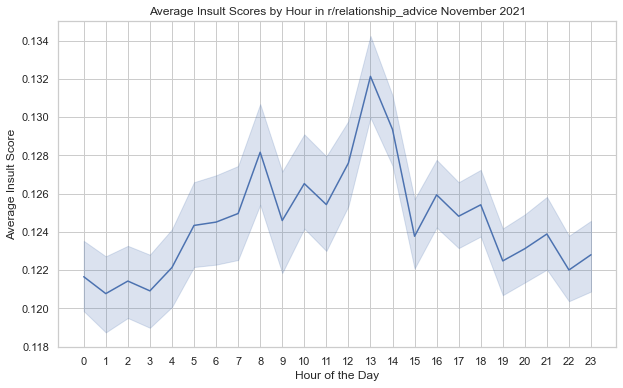

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Insult",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Insult Scores by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Insult Score')

Text(0, 0.5, 'Average Insult Score')

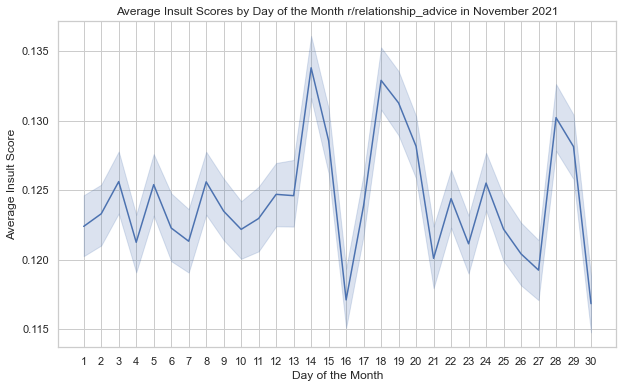

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Insult",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Insult Scores by Day of the Month r/relationship_advice in November 2021')
plt.xlabel("Day of the Month")
plt.ylabel('Average Insult Score')

# Threat

Text(0, 0.5, 'Average Threat Score')

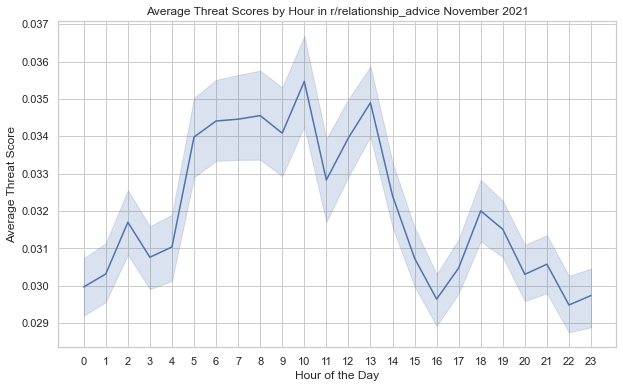

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Threat",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Threat Scores by Hour in r/relationship_advice November 2021')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Threat Score')

Text(0, 0.5, 'Average Threat Score')

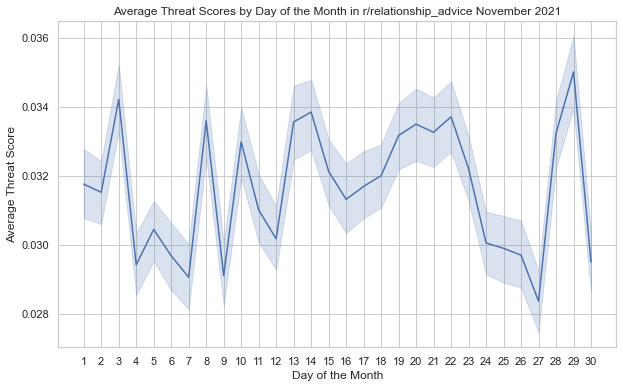

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Threat",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Threat Scores by Day of the Month in r/relationship_advice November 2021')
plt.xlabel("Day of the Month")
plt.ylabel('Average Threat Score')

# Summary

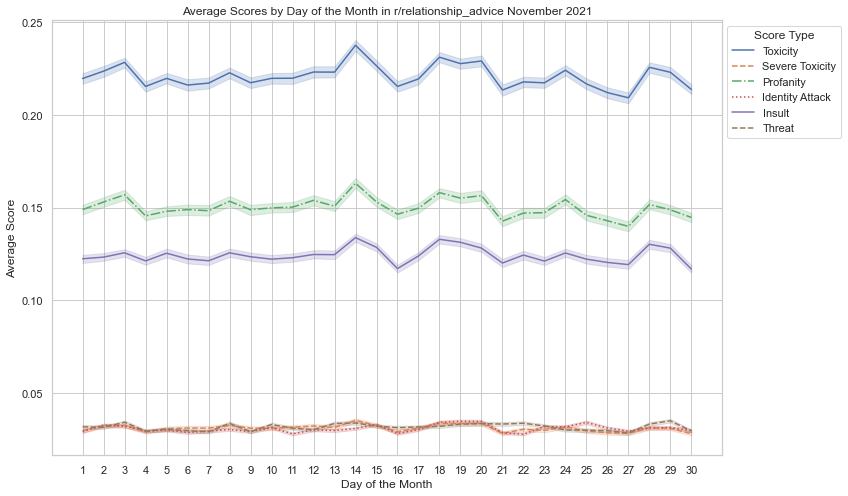

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 8))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line charts für jede Spalte
sns.lineplot(data=df, x="created_day", y="Toxicity", label="Toxicity", palette="tab10")
sns.lineplot(data=df, x="created_day", y="Severe Toxicity", label="Severe Toxicity", palette="tab10", linestyle='--')
sns.lineplot(data=df, x="created_day", y="Profanity", label="Profanity", palette="tab10", linestyle='-.')
sns.lineplot(data=df, x="created_day", y="Identity Attack", label="Identity Attack", palette="tab10", linestyle=':')
sns.lineplot(data=df, x="created_day", y="Insult", label="Insult", palette="tab10", linestyle='-')
sns.lineplot(data=df, x="created_day", y="Threat", label="Threat", palette="tab10", linestyle='--')

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day of the Month in r/relationship_advice November 2021')
plt.xlabel("Day of the Month")
plt.ylabel('Average Score')

# Legende hinzufügen
plt.legend(title="Score Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


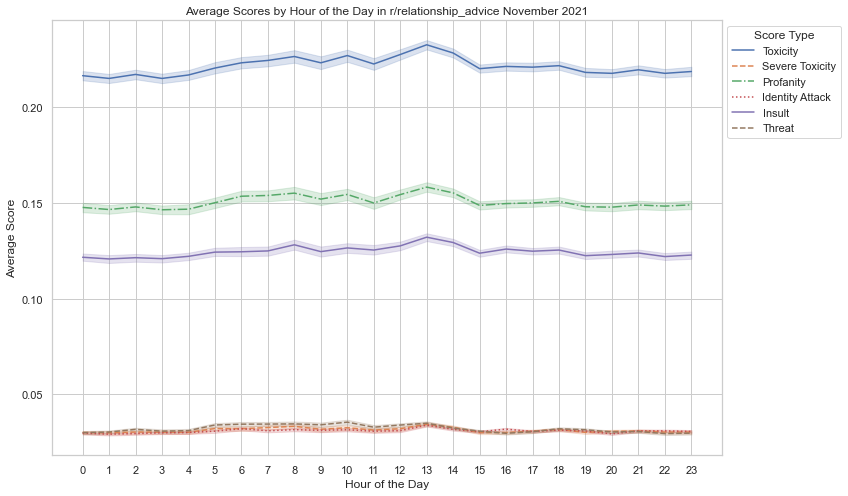

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 8))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line charts für jede Spalte
sns.lineplot(data=df, x="created_hour", y="Toxicity", label="Toxicity", palette="tab10")
sns.lineplot(data=df, x="created_hour", y="Severe Toxicity", label="Severe Toxicity", palette="tab10", linestyle='--')
sns.lineplot(data=df, x="created_hour", y="Profanity", label="Profanity", palette="tab10", linestyle='-.')
sns.lineplot(data=df, x="created_hour", y="Identity Attack", label="Identity Attack", palette="tab10", linestyle=':')
sns.lineplot(data=df, x="created_hour", y="Insult", label="Insult", palette="tab10", linestyle='-')
sns.lineplot(data=df, x="created_hour", y="Threat", label="Threat", palette="tab10", linestyle='--')

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour of the Day in r/relationship_advice November 2021')
plt.xlabel("Hour of the Day")
plt.ylabel('Average Score')

# Legende hinzufügen
plt.legend(title="Score Type", loc="upper left", bbox_to_anchor=(1, 1))

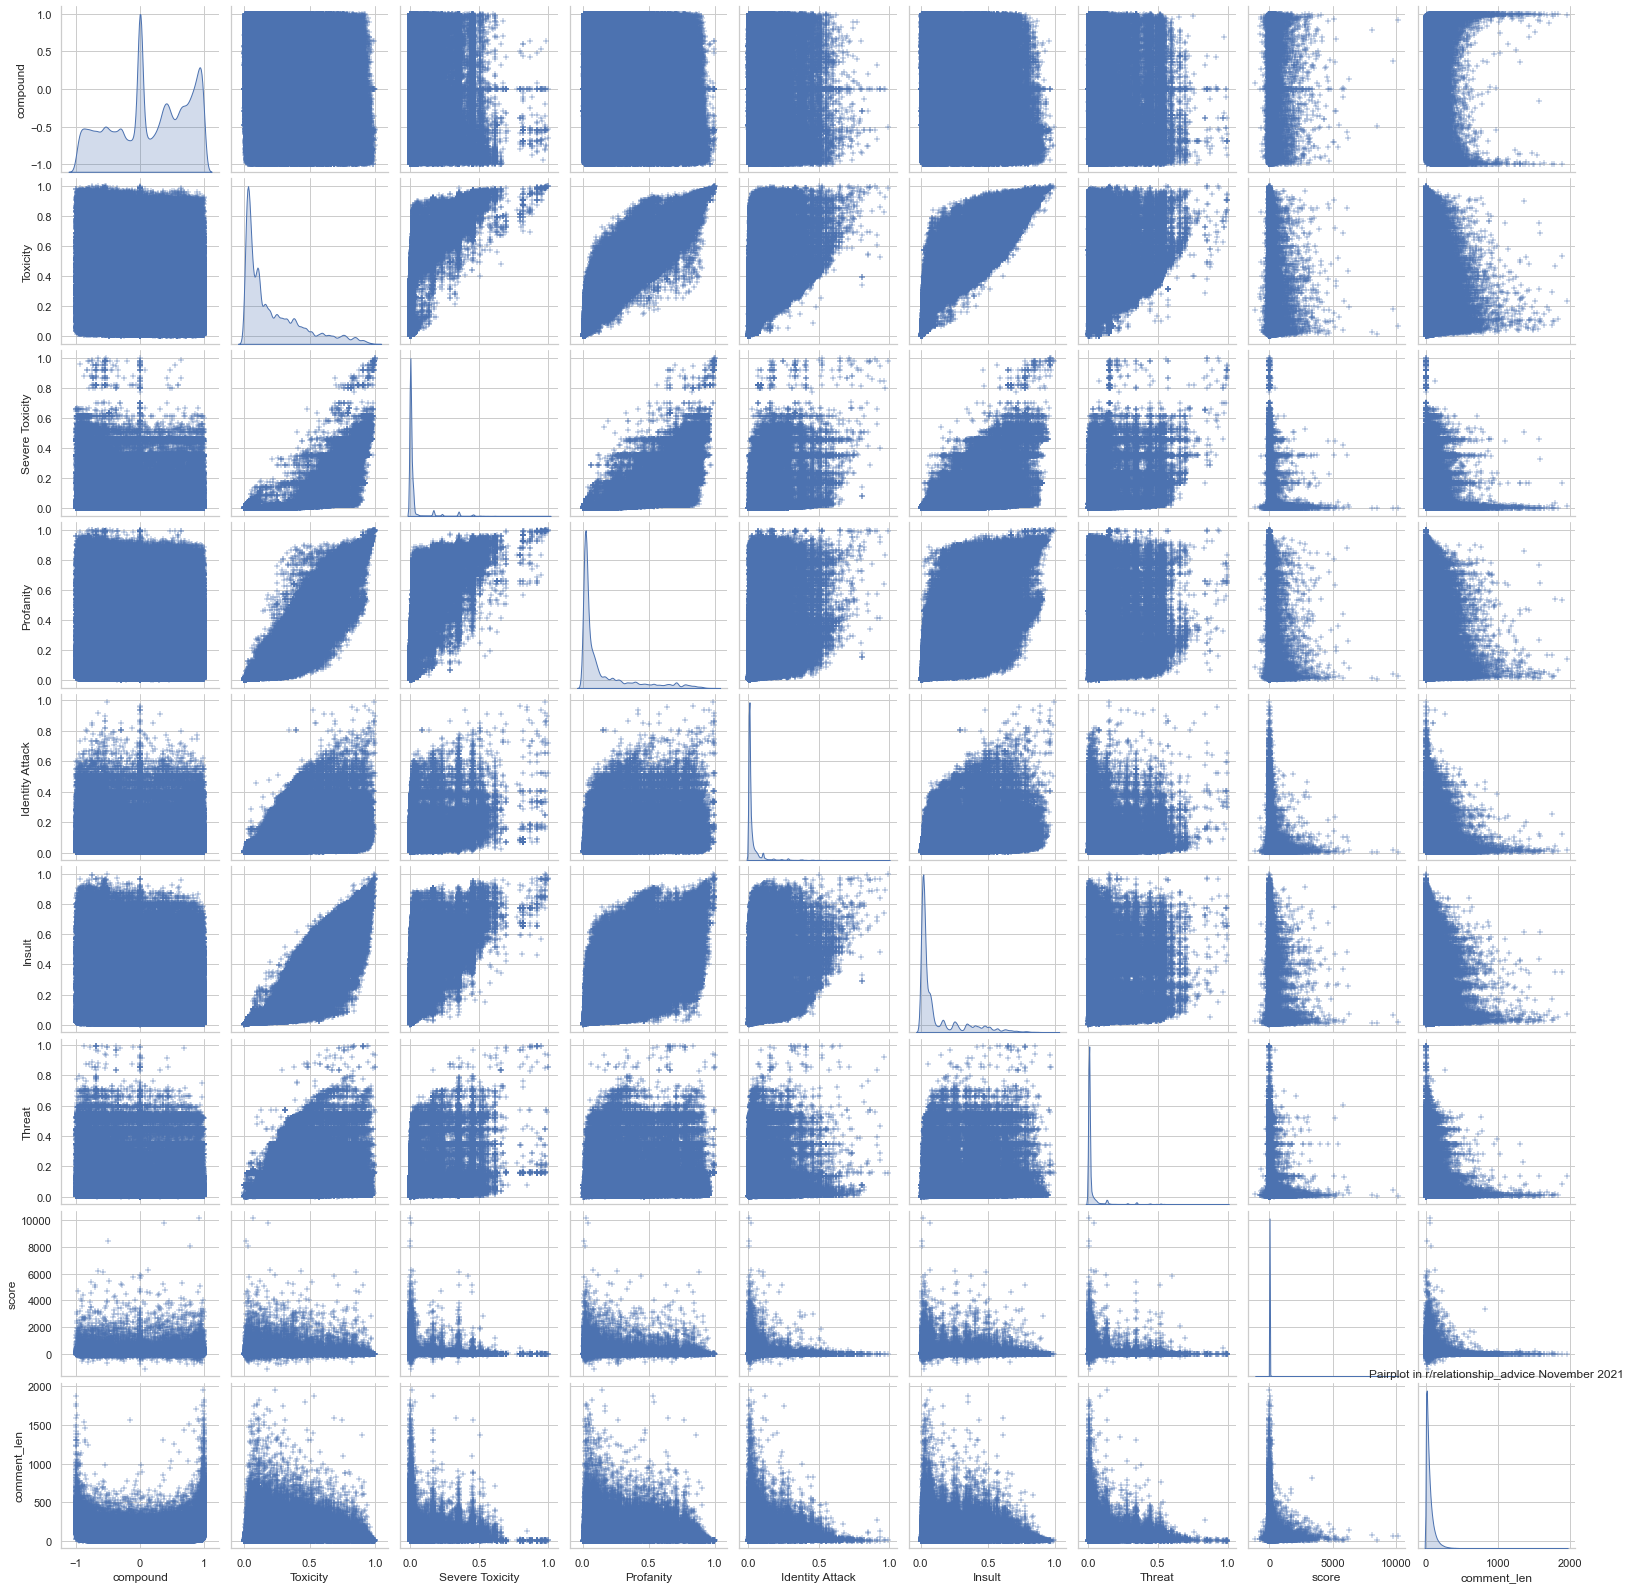

In [78]:
# Erstelle eine Pairplot-Matrix für ausgewählte Spalten
selected_columns = ['compound', 'Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat',"score","comment_len"]
sns.pairplot(df[selected_columns], diag_kind='kde', markers='+')
plt.title("Pairplot in r/relationship_advice November 2021")
plt.show()




# Submission based

# Nr of toxcix users

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725735 entries, 0 to 725734
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   author                         725735 non-null  object 
 1   Toxicity                       711910 non-null  float64
 2   Severe Toxicity                711910 non-null  float64
 3   Profanity                      711910 non-null  float64
 4   Identity Attack                711910 non-null  float64
 5   Insult                         711910 non-null  float64
 6   Threat                         711910 non-null  float64
 7   author_flair_text              725735 non-null  object 
 8   body                           725735 non-null  object 
 9   controversiality               725735 non-null  bool   
 10  created_utc                    725735 non-null  object 
 11  distinguished                  725735 non-null  object 
 12  edited                        

In [80]:
import pandas as pd

# Kategorien für die Berechnung
categories = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# DataFrame für die Ergebnisse erstellen
results_df = pd.DataFrame(columns=['Category', 'NumToxicUsers'])

for category in categories:
    # Gruppiere den DataFrame nach 'user_id' und berechne den Durchschnitt für jede Kategorie
    user_category_mean = df.groupby('author')[category].mean().reset_index()

    # Filtere Benutzer mit einem Durchschnitt von 0,7 oder größer
    toxic_users_category = user_category_mean[user_category_mean[category] >= 0.7]

    # Zähle die Anzahl der toxischen Benutzer für die Kategorie
    num_toxic_users_category = toxic_users_category.shape[0]

    # Ergebnisse zum DataFrame hinzufügen
    results_df = results_df.append({'Category': category, 'NumToxicUsers': num_toxic_users_category}, ignore_index=True)

# Ausgabe der Ergebnisse
print(results_df)





          Category NumToxicUsers
0         Toxicity          3781
1  Severe Toxicity            32
2        Profanity          3079
3  Identity Attack            14
4           Insult           797
5           Threat            26


In [81]:
# DataFrame für prozentuale Ergebnisse erstellen
percentage_results_df = pd.DataFrame(columns=['Category', 'PercentToxicUsers'])

# Gesamtanzahl der Benutzer
total_users = df['author'].nunique()

for category in categories:
    # Gruppiere den DataFrame nach 'user_id' und berechne den Durchschnitt für jede Kategorie
    user_category_mean = df.groupby('author')[category].mean().reset_index()

    # Filtere Benutzer mit einem Durchschnitt von 0,7 oder größer
    toxic_users_category = user_category_mean[user_category_mean[category] >= 0.7]

    # Zähle die Anzahl der toxischen Benutzer für die Kategorie
    num_toxic_users_category = toxic_users_category.shape[0]

    # Berechne den prozentualen Anteil toxischer Benutzer für die Kategorie
    percent_toxic_users_category = (num_toxic_users_category / total_users) * 100

    # Ergebnisse zum DataFrame hinzufügen
    percentage_results_df = percentage_results_df.append({'Category': category, 'PercentToxicUsers': percent_toxic_users_category}, ignore_index=True)

# Ausgabe der prozentualen Ergebnisse
print(percentage_results_df)



          Category  PercentToxicUsers
0         Toxicity           3.139140
1  Severe Toxicity           0.026568
2        Profanity           2.556311
3  Identity Attack           0.011623
4           Insult           0.661702
5           Threat           0.021586
